In [4]:
import json
import requests
import pandas as pd

In [32]:
kuaiban_df = pd.read_csv('kuaiban_df.csv')
liushui_df = pd.read_csv('liushui_df.csv')
kuaisanyan_df = pd.read_csv('kuaisanyan_df.csv')
manban_df = pd.read_csv('manban_df.csv')
sanban_df = pd.read_csv('sanban_df.csv')
yaoban_df = pd.read_csv('yaoban_df.csv')
yuanban_df = pd.read_csv('yuanban_df.csv')
zhongsanyan_df = pd.read_csv('zhongsanyan_df.csv')

total = pd.concat([kuaiban_df, liushui_df, kuaisanyan_df, manban_df, sanban_df, yaoban_df, yuanban_df, zhongsanyan_df], axis=1)

In [33]:
total

,MFCC1_mean,MFCC1_std,MFCC2_mean,MFCC2_std,MFCC3_mean,MFCC3_std,MFCC4_mean,MFCC4_std,MFCC5_mean,MFCC5_std,...,SC_mean,SC_std,SFL_mean,SFL_std,RMS_mean,RMS_std,SCR_mean,SCR_std,ZCR_mean,ZCR_std
0,-23.682318,0.938014,-1.041646,0.386471,-0.560500,0.013670,-0.138296,-0.147532,-0.376818,-0.209364,...,0.312092,0.355825,0.307782,0.304382,0.286245,806.326134,0.000028,4.201741,0.025036,0.033832
1,-23.682318,0.938014,-1.041646,0.386471,-0.560500,0.013670,-0.138296,-0.147532,-0.376818,-0.209364,...,0.312092,0.355825,0.307782,0.304382,0.286245,806.326134,0.000028,4.201741,0.025036,0.033832
2,-27.786245,0.670776,-1.470122,0.195849,-0.485658,-0.213851,-0.328058,-0.134928,-0.399488,-0.226020,...,0.351667,0.387879,0.388108,0.412199,0.415816,598.758253,0.000029,4.656338,0.028998,0.026371
3,-25.471660,0.785129,-1.551326,0.142474,-0.481725,-0.167248,-0.207527,0.000914,-0.565546,-0.226185,...,0.351667,0.387879,0.388108,0.412199,0.415816,598.758253,0.000029,4.656338,0.028998,0.026371
4,-27.786245,0.670776,-1.470122,0.195849,-0.485658,-0.213851,-0.328058,-0.134928,-0.399488,-0.226020,...,0.322981,0.416941,0.344184,0.379642,0.411395,612.240717,0.000030,4.950076,0.028839,0.028398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
total['MFCC3_std'] = (total['MFCC3_std'] - total['MFCC3_std'].mean()) / total['MFCC3_std'].std()
total['MFCC3_std']

,MFCC3_std,MFCC3_std,MFCC3_std,MFCC3_std,MFCC3_std,MFCC3_std,MFCC3_std,MFCC3_std
0,1.012422,-0.485948,0.659062,0.390564,0.018030,1.032299,-0.186211,0.276123
1,1.012422,-0.485948,0.659062,0.390564,0.018030,1.032299,-0.186211,0.276123
2,-0.299499,0.225709,-0.965624,1.107108,-0.373703,-1.013670,-0.511557,-0.628964
3,-0.030778,0.225709,-0.965624,1.107108,-0.373703,-1.013670,0.003505,-0.628964
4,-0.299499,-0.325069,-1.334148,0.017199,-0.490094,-0.416296,0.168748,-0.037323
...,...,...,...,...,...,...,...,...
290,NaN,NaN,NaN,NaN,NaN,NaN,-1.388370,NaN
291,NaN,NaN,NaN,NaN,NaN,NaN,-0.344017,NaN
292,NaN,NaN,NaN,NaN,NaN,NaN,-0.344017,NaN
293,NaN,NaN,NaN,NaN,NaN,NaN,5.108746,NaN


In [34]:
cols = total.columns
for i in range(36):
    total[cols[i]] = (total[cols[i]] - total[cols[i]].mean()) / total[cols[i]].std()

In [35]:
total

,MFCC1_mean,MFCC1_std,MFCC2_mean,MFCC2_std,MFCC3_mean,MFCC3_std,MFCC4_mean,MFCC4_std,MFCC5_mean,MFCC5_std,...,SC_mean,SC_std,SFL_mean,SFL_std,RMS_mean,RMS_std,SCR_mean,SCR_std,ZCR_mean,ZCR_std
0,1.033441,0.655594,0.619498,0.599784,-0.941894,1.012422,1.171607,-0.267680,-0.411221,-0.588478,...,-1.144582,-1.101210,-1.617197,-1.236722,-1.114625,1.433380,0.302890,0.008922,-0.149196,2.020494
1,1.033441,0.655594,0.619498,0.599784,-0.941894,1.012422,1.171607,-0.267680,-0.411221,-0.588478,...,-1.144582,-1.101210,-1.617197,-1.236722,-1.114625,1.433380,0.302890,0.008922,-0.149196,2.020494
2,-1.126534,-0.447170,-1.032867,-0.307415,-0.463679,-0.299499,0.118271,-0.147742,-0.512833,-0.710044,...,-0.549334,-0.534963,-0.206869,0.327604,0.597590,-0.038498,0.495803,0.690428,0.779280,0.191849
3,0.091677,0.024710,-1.346020,-0.561436,-0.438547,-0.030778,0.787318,1.144839,-1.257114,-0.711251,...,-0.549334,-0.534963,-0.206869,0.327604,0.597590,-0.038498,0.495803,0.690428,0.779280,0.191849
4,-1.126534,-0.447170,-1.032867,-0.307415,-0.463679,-0.299499,0.118271,-0.147742,-0.512833,-0.710044,...,-0.980799,-0.021584,-0.978075,-0.144766,0.539172,0.057107,0.561171,1.130782,0.742027,0.688812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
types = [kuaiban_df, liushui_df, kuaisanyan_df, manban_df, sanban_df, yaoban_df, yuanban_df, zhongsanyan_df]
for i in range(len(types)):
    types[i] = total.iloc[:, (i*36):((i*36)+36)]

In [50]:
kuaiban_df = total.iloc[:, 0:36]
liushui_df = total.iloc[:, 36:36*2]
kuaisanyan_df = total.iloc[:, 36*2:36*3]
manban_df = total.iloc[:, 36*3:36*4]
sanban_df = total.iloc[:, 36*4:36*5]
yaoban_df = total.iloc[:, 36*5:36*6]
yuanban_df = total.iloc[:, 36*6:36*7]
zhongsanyan_df = total.iloc[:, 36*7:36*8]
, 'kuaisanyan', 'manban', 'sanban', 'yaoban', 'yuanban', 'zhongsanyan'

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
kuaiban = plt.scatter(kuaiban_df['ZCR_mean'], kuaiban_df['ZCR_std'], color='red')
liushui = plt.scatter(liushui_df['ZCR_mean'], liushui_df['ZCR_std'], color='blue')
kuaisanyan = plt.scatter(kuaisanyan_df['ZCR_mean'], kuaisanyan_df['ZCR_std'], color='green')
manban = plt.scatter(manban_df['ZCR_mean'], manban_df['ZCR_std'], color='cyan')
sanban = plt.scatter(sanban_df['ZCR_mean'], sanban_df['ZCR_std'], color='magenta')
yaoban = plt.scatter(yaoban_df['ZCR_mean'], yaoban_df['ZCR_std'], color='yellow')
yuanban = plt.scatter(yuanban_df['ZCR_mean'], yuanban_df['ZCR_std'], color='brown')
zhongsanyan = plt.scatter(zhongsanyan_df['ZCR_mean'], zhongsanyan_df['ZCR_std'], color='orange')
plt.title("ZCR")
plt.xlabel("ZCR Mean")
plt.ylabel("ZCR Std")
plt.legend((kuaiban, liushui, kuaisanyan, manban, sanban, yaoban, yuanban, zhongsanyan), ('kuaiban', 'liushui', 'kuaisanyan', 'manban', 'sanban', 'yaoban', 'yuanban', 'zhongsanyan'))
plt.savefig('ZCR.png')

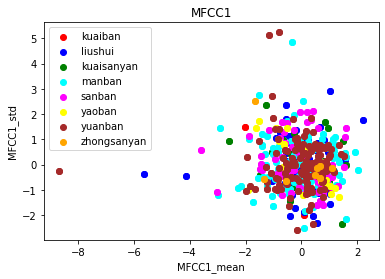

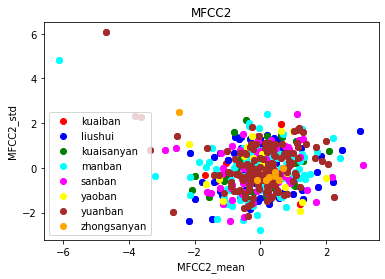

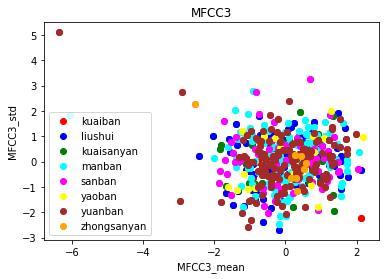

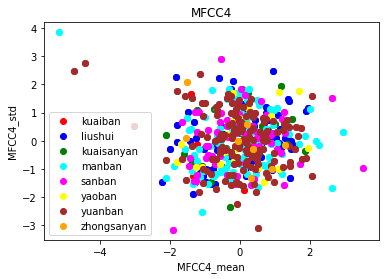

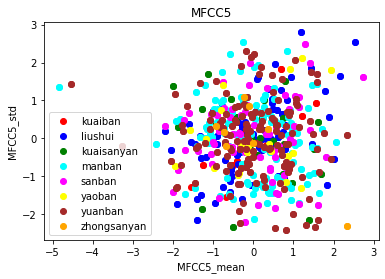

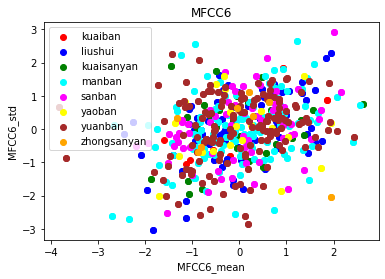

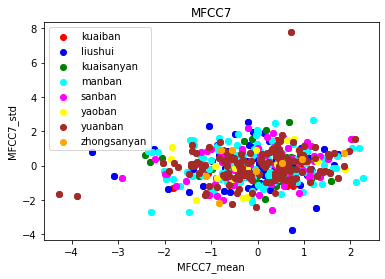

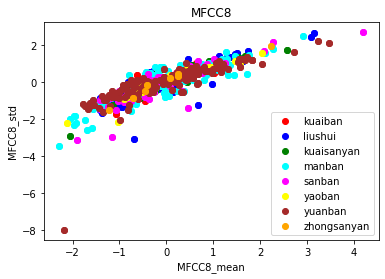

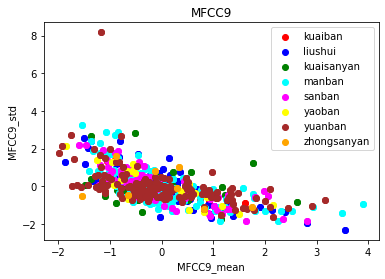

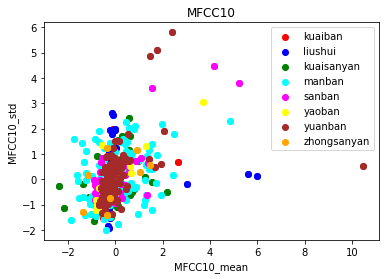

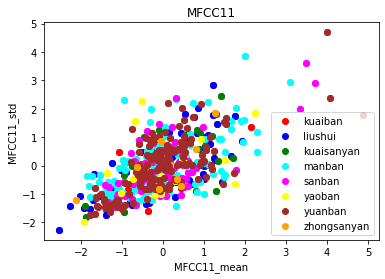

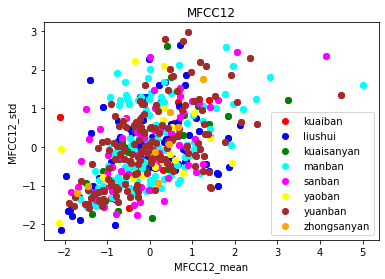

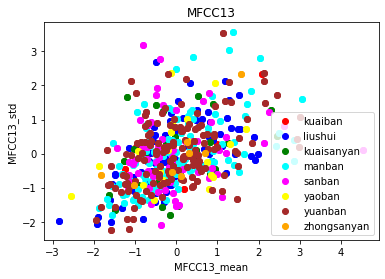

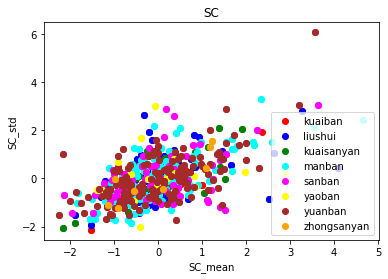

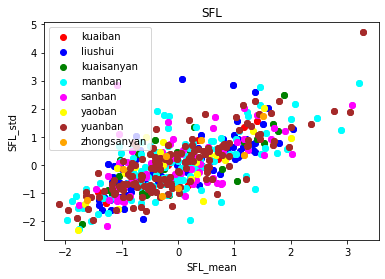

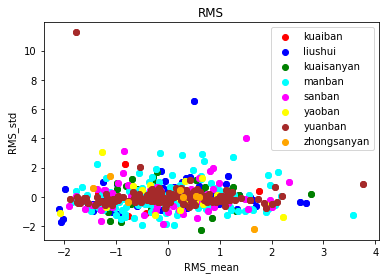

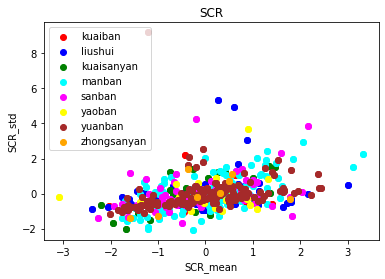

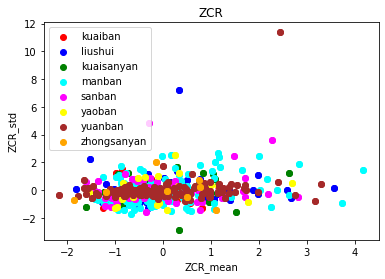

In [59]:
cols = total.columns
for i in range(18):
    plot_name = cols[i*2].split('_')[0]
    x = cols[i*2]
    y = cols[(i*2)+1]
    plt.figure()
    kuaiban = plt.scatter(kuaiban_df[x], kuaiban_df[y], color='red')
    liushui = plt.scatter(liushui_df[x], liushui_df[y], color='blue')
    kuaisanyan = plt.scatter(kuaisanyan_df[x], kuaisanyan_df[y], color='green')
    manban = plt.scatter(manban_df[x], manban_df[y], color='cyan')
    sanban = plt.scatter(sanban_df[x], sanban_df[y], color='magenta')
    yaoban = plt.scatter(yaoban_df[x], yaoban_df[y], color='yellow')
    yuanban = plt.scatter(yuanban_df[x], yuanban_df[y], color='brown')
    zhongsanyan = plt.scatter(zhongsanyan_df[x], zhongsanyan_df[y], color='orange')
    plt.title(plot_name)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend((kuaiban, liushui, kuaisanyan, manban, sanban, yaoban, yuanban, zhongsanyan), ('kuaiban', 'liushui', 'kuaisanyan', 'manban', 'sanban', 'yaoban', 'yuanban', 'zhongsanyan'))
    plt.savefig(plot_name + '.png')

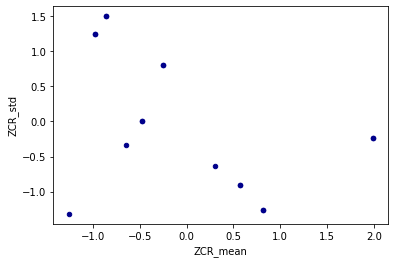

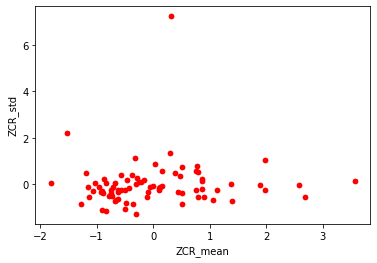

In [53]:
kuaiban_df.plot.scatter(x='ZCR_mean',y='ZCR_std',c='DarkBlue')
liushui_df.plot.scatter(x='ZCR_mean',y='ZCR_std',c='Red')

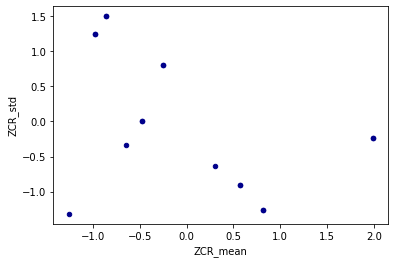

In [25]:
ax1 = df.plot.scatter(x='ZCR_mean',y='ZCR_std',c='DarkBlue')